In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [139]:
data = pd.read_csv('autompg.csv',index_col='car name')

In [140]:
data.shape

(398, 8)

In [141]:
data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)

In [142]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b


In [143]:
data_scale = data.copy()

In [144]:
data_scale ['displacement'] = scale(data_scale['displacement'])
#data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [145]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [146]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,130,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,165,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,150,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,150,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,140,0.520556,0.148810,70,1,USA


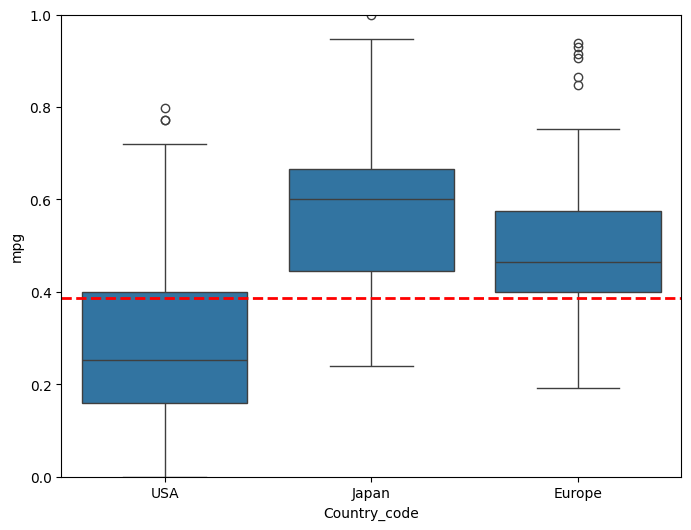

In [147]:
############################################################################################
#                                         MPG BY COUNTRY                                   #
############################################################################################
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


WE CAN SEE FROM THIS GRAPH THAT WHILE THE COUNTRIES VARY IN MPG. THE USA HAS THE WORST MPG, AND JAPAN HAS THE BEST. EUROPE IS SLIGHTLY BEHIND JAPAN AT SECOND.

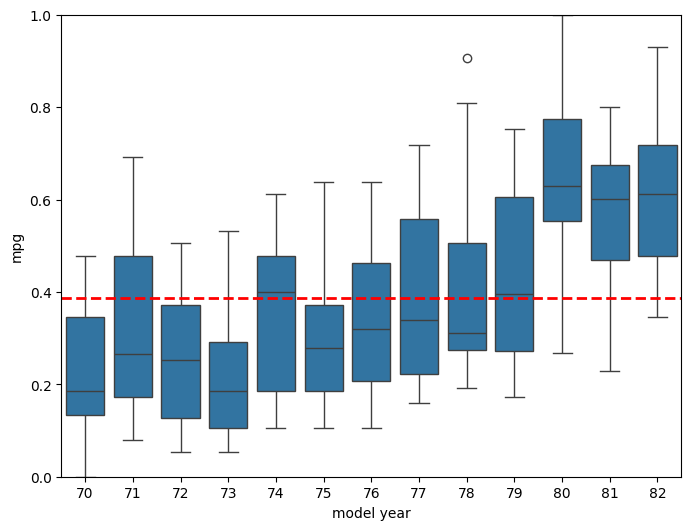

In [148]:
############################################################################################
#                                       MPG BY MODEL YEAR                                  #
############################################################################################
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


THIS GRAPH SHOWS US THAT SLOWLY OVER TIME THE MPG OF THE CARS HAS INCREASED. WITH AN SMALL OUTLIER IN 1974, IT REMAINS RELATIVELY CONSISTENT UNTIL 1980, WHERE IT JUMPS UP IN MPG AVERAGES.

In [149]:
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru', 'subaru dl', 'subaru dl', 'subaru'], dtype='object', name='car name')

In [150]:
data['Company_Name'] = data.index.to_series().str.extract('(^.*?)\s')

In [151]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)  ## Strin methords will not work on null values so we use fillna()

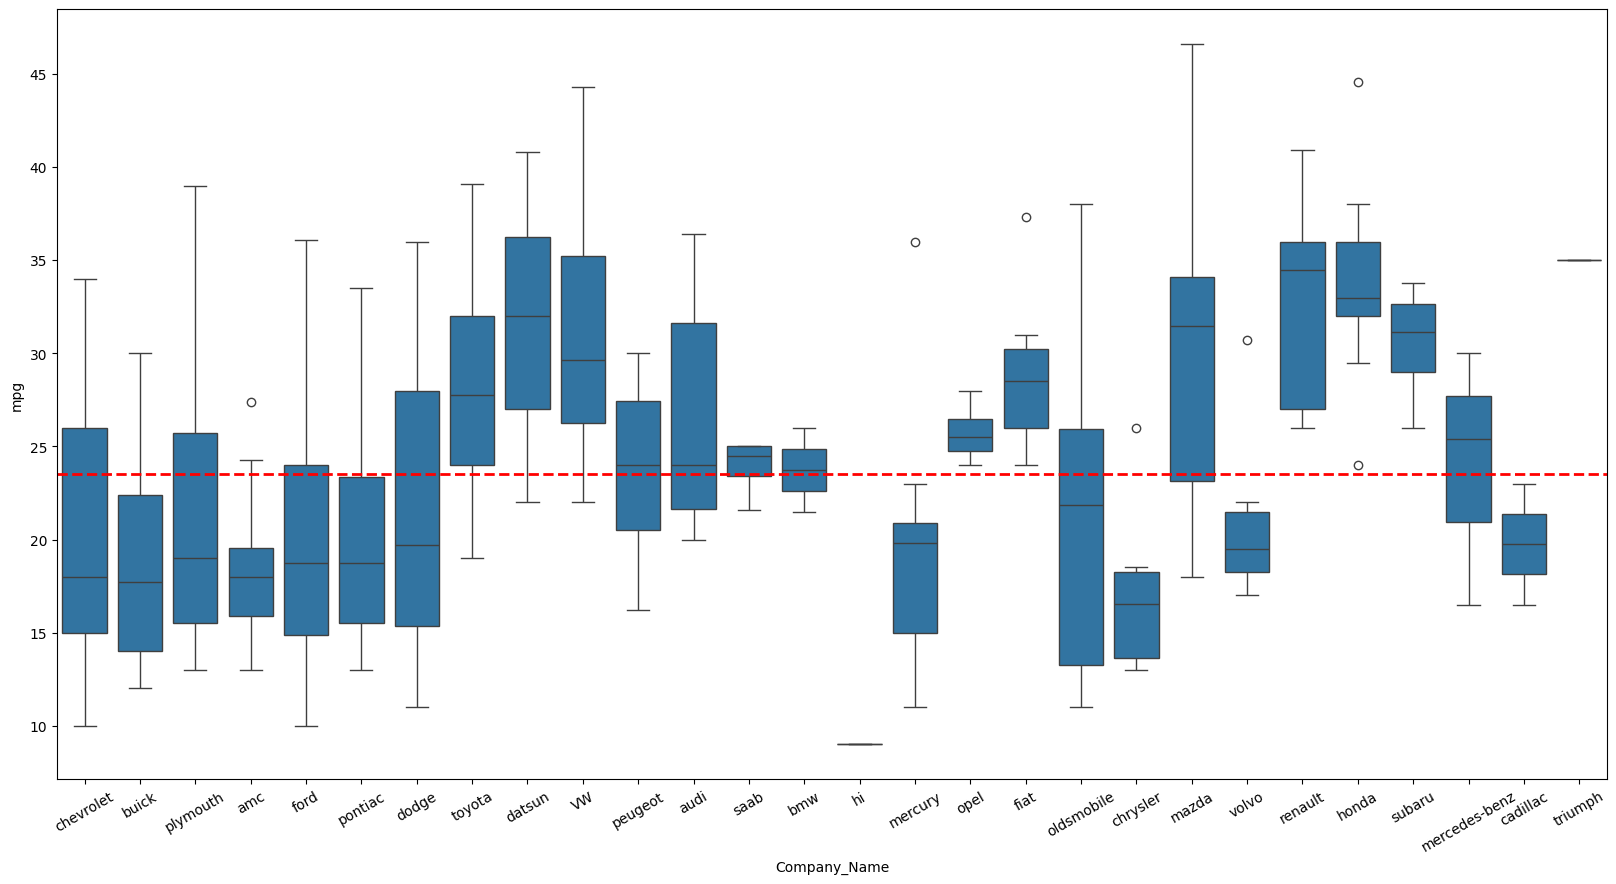

In [152]:
############################################################################################
#                                       MPG BY MANUFACTURER                                #
############################################################################################
var = 'Company_Name'
data_plt = pd.concat([data['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

THIS GRAPH SHOWS A WIDE VARIETY OF MPG'S BY MANFACTURER. THE US COMPANIES ARE DEFINTELY THE WORST.

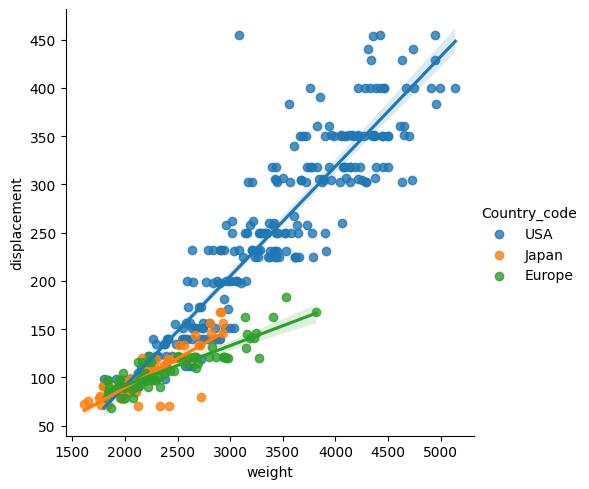

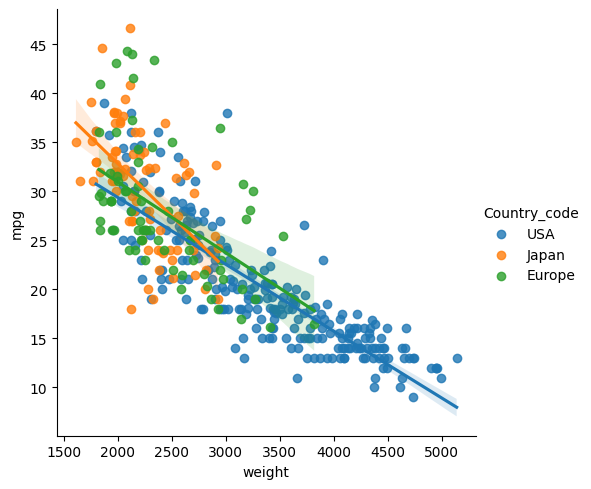

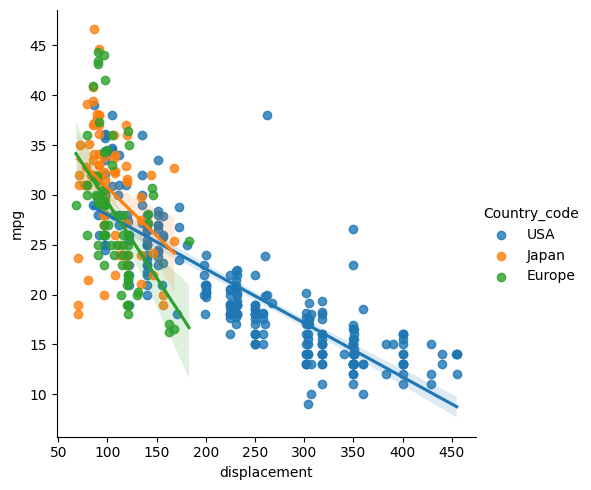

In [153]:
############################################################################################
#                        RELATIONS BETWEEN MPG, WEIGHT, DISPLACEMENT                       #
############################################################################################
var = 'weight'
plot = sns.lmplot(data, x=var,y='displacement',hue='Country_code')

var = 'weight'
plot = sns.lmplot(data, x=var,y='mpg',hue='Country_code')

var = 'displacement'
plot = sns.lmplot(data, x=var,y='mpg',hue='Country_code')

AFTER LOOKING AT THE RELATIONS BETWEEN DISPLACEMENT, MPG, AND THEN WEIGHT, WE GET A CLUE AS TO WHY THE US HAS SUCH BAD GAS MILEAGE. THE US HAS ON AVERAGE A MUCH HIGHER WEIGHT AND DISPLACEMENT. LOOKING AT THESE GRAPHS, THE US GAS MILEAGE DOES NOT LOOK TOO BAD, CONSIDERING THE HIGH DISPLACEMENT AND WEIGHT THEY HAVE